In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train_dataset_Самолет.csv')

C:\Users\zorik\AppData\Local\Temp\ipykernel_5796\63882470.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,821,822,825,826,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,

In [3]:
df_target_1 = df.loc[df['target'] == 1, :]

In [4]:
df_target_0 = df.loc[df['target'] == 0, :]

In [5]:
nans_1 = df_target_1.isna().sum().to_frame().rename(columns={0: 'absolute'})

nans_1['percent'] = (df_target_1.isna().sum() / df_target_1.shape[0] * 100).round(2)

nans_1

,absolute,percent
report_date,0,0.00
client_id,0,0.00
target,0,0.00
col1,436,100.00
col2,436,100.00
...,...,...
col2659,409,93.81
col2660,156,35.78
col2661,156,35.78
col2662,156,35.78


In [6]:
nans_0 = df_target_0.isna().sum().to_frame().rename(columns={0: 'absolute'})

nans_0['percent'] = (df_target_0.isna().sum() / df_target_0.shape[0] * 100).round(2)

nans_0

,absolute,percent
report_date,0,0.00
client_id,0,0.00
target,0,0.00
col1,14017,99.98
col2,14014,99.96
...,...,...
col2659,13541,96.58
col2660,6264,44.68
col2661,6264,44.68
col2662,6264,44.68


In [7]:
nans_delta = nans_1.percent - nans_0.percent

In [8]:
np.sum(nans_delta>12)

192

In [9]:
np.sum(nans_delta<-10)

268

In [10]:
df_10percent = df.loc[:, (df.isna().sum() < df.shape[0] * 0.5)|(nans_delta>12)|(nans_delta<-10)]

In [11]:
df_10percent

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,0,fdf04fb7-5404-4a9c-ae5b-e1e893060631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [12]:
df_10percent = df_10percent.copy()
df_10percent['report_date'] = pd.to_datetime(df_10percent['report_date'])
df_10percent['month'] = pd.DatetimeIndex(df_10percent['report_date']).month
drop_cols = ['report_date']
df_10percent = df_10percent.drop(drop_cols, axis=1)
drop_cols = ['col1454']
df_10percent = df_10percent.drop(drop_cols, axis=1)
# df_1 = df_1.fillna(0)
df_target = df_10percent.target
df_X = df_10percent.drop(['target'], axis=1)
df_X = df_X.drop(['client_id'], axis=1)

In [13]:
df_X

,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,col1463,...,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663,month
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261,11
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261,11
2,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261,5
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682,9
4,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902,7
14452,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516,9
14453,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005,2
14454,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261,8


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
df_X_impute = df_X.copy()

In [16]:
np.sum(df_X_impute.isna().sum() > 0)

580

In [17]:
df_X_impute.loc[:, (df_X_impute.isna().sum() < df_X_impute.shape[0] * 0.2)] = \
df_X_impute.loc[:, (df_X_impute.isna().sum() < df_X_impute.shape[0] * 0.2)] \
.fillna(df_X_impute.loc[:, (df_X_impute.isna().sum() < df_X_impute.shape[0] * 0.2)].median())

In [18]:
df_X_impute

,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,col1463,...,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663,month
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261,11
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261,11
2,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261,5
3,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682,9
4,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902,7
14452,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516,9
14453,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005,2
14454,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261,8


In [19]:
np.sum(df_X_impute.isna().sum() > 0)

531

In [20]:
df_X_impute = df_X_impute.fillna(-1)

In [21]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(df_X_impute, df_target)

RandomForestClassifier(n_estimators=1000, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

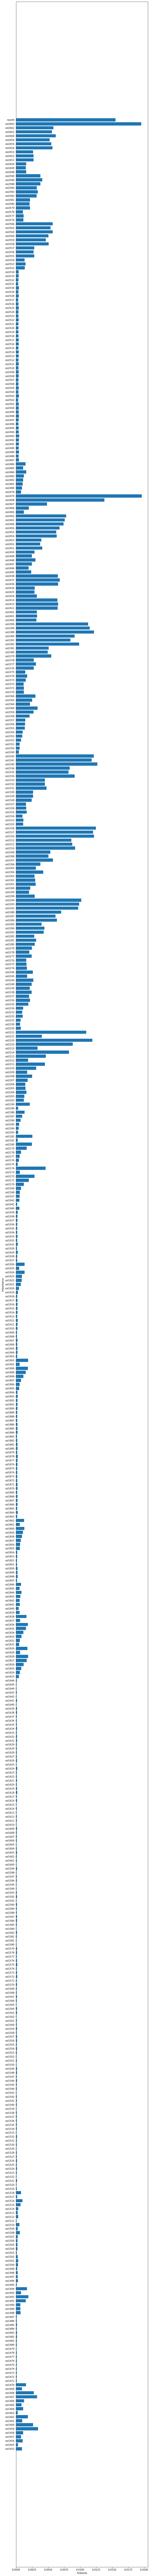

In [22]:
plt.figure(figsize=(10,200))
plt.barh(df_X.columns, clf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

In [23]:
df_X_selected_feat = df_X_impute.loc[:, clf.feature_importances_ > 0.002]

In [24]:
df_X_selected_feat

,col1459,col1460,col1467,col1468,col2172,col2174,col2180,col2182,col2190,col2208,...,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663,month
0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.256261,11
1,0.0,1.0,0.0,1.0,6.0,6.0,2.0,2.0,2.0,-1.00,...,-1.0,-1.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261,11
2,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.256261,5
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,10000.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.258682,9
4,0.0,4.0,0.0,4.0,3.0,3.0,1.0,1.0,1.0,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.254164,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2.0,2.0,2.0,2.0,0.0,3.0,0.0,1.0,2.0,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.276902,7
14452,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.260516,9
14453,1.0,1.0,1.0,1.0,6.0,6.0,2.0,2.0,2.0,10725097.19,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.260005,2
14454,-1.0,-1.0,-1.0,-1.0,3.0,3.0,1.0,1.0,1.0,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.256261,8


In [25]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score

In [26]:
from sklearn.model_selection import StratifiedKFold

In [27]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rocauc_lst = []
recall_lst = []
precision_lst = []

for train_ix, test_ix in kfold.split(df_X_selected_feat, df_target):
    # select rows
    train_X, test_X = df_X_selected_feat.loc[train_ix, :], df_X_selected_feat.loc[test_ix, :]
    train_y, test_y = df_target[train_ix], df_target[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    base = XGBClassifier(
        n_estimators=1000,
        random_state=42,
        scale_pos_weight=30,
        eta=0.20,
        max_depth=5)
    
    base.fit(train_X, train_y)
    
    base_preds = base.predict_proba(test_X)[:, 1]
    
    rocauc = roc_auc_score(test_y, base_preds)
    rocauc_lst.append(rocauc)
    
    recall = recall_score(test_y, base_preds > 0.5)
    recall_lst.append(recall)
    
    precision = precision_score(test_y, base_preds > 0.5)
    precision_lst.append(precision)

>Train: 0=11216, 1=348, Test: 0=2804, 1=88
>Train: 0=11216, 1=349, Test: 0=2804, 1=87
>Train: 0=11216, 1=349, Test: 0=2804, 1=87
>Train: 0=11216, 1=349, Test: 0=2804, 1=87
>Train: 0=11216, 1=349, Test: 0=2804, 1=87


In [28]:
rocauc = np.mean(rocauc_lst)
rocauc

0.9662021488931322

In [29]:
recall = np.mean(recall_lst)
recall

0.718025078369906

In [30]:
precision = np.mean(precision_lst)
precision

0.8009570583676295

In [38]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.7572271466477676

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_X_selected_feat, 
                                                    df_target, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df_target)

In [40]:
# Train model
model = XGBClassifier(
        n_estimators=1000,
        random_state=42,
        scale_pos_weight=30,
        eta=0.20,
        max_depth=5)

In [41]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [42]:
preds = model.predict_proba(X_test)[:, 1]
columns = ['Машиноместа']
pd.DataFrame(preds, columns=columns).to_csv('data_to_streamlit/val_proba.csv', index=False)
pd.DataFrame(y_test.astype(float)).to_csv('data_to_streamlit/val_y.csv', index=False, sep=',')

In [43]:
base_preds = model.predict_proba(X_test)[:, 1]

In [44]:
roc_auc_score(y_test, base_preds)

0.9767451390169443

In [45]:
recall_score(y_test, base_preds > 0.5)

0.6781609195402298

In [46]:
precision_score(y_test, base_preds > 0.5)

0.8309859154929577